## Module Name: Machine Learning
## Module Code: 6COSC017C
### Student Id: 00015986
## Database Name: Predict Students' Dropout and Academic Success

### Import Modules

In [1]:
import joblib
import os
# NumPy is used for working with numerical data and arrays
import numpy as np
# Pandas is used for loading and working with datasets tables
import pandas as pd
# Matplotlib and Seaborn are used for drawing graphs and visualizations
from matplotlib import pyplot as plt
import seaborn as sns
# LabelEncoder will help convert categorical text data into number
from sklearn.preprocessing import LabelEncoder
# GridSearchCV is used for hyperparameter tuning, and train_test_split is used to divide the data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV
# Metrics for evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Machine learning models that do not require feature scaling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# dditional metrics for confusion matrix and classification evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler # scaler
from sklearn.neighbors import KNeighborsClassifier # k neighbor classifier
from sklearn.feature_selection import SelectKBest, chi2 # featured selection

## Data Load

<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600; font-size:14px;">
    Firstly we are going to load the dataset from the CSV file into a pandas DataFrame, <code> sep=";" </code> is used because the dataset uses semicolon as the separator. Then we can display the data if it loaded correctly.
</div>

In [2]:
data = pd.read_csv("src/dataset/data.csv", sep=";")
display(data)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Exploraty Data Analysis

### Statistical summary data

<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600; font-size:14px;">
    In this section, Using <code> .describe() </code> to generate summary statictis for numerical information,
    and it gives me the mean, standard deviation, min, max and quartiles.
</div>

In [3]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600; font-size:14px;">
    Since my dataset originally had one object column (<b>Target</b>),  
    I am using <code>numeric_only=True</code> to make sure Pandas  
    calculates correlations only for numeric features. To avoid errors and get a correct correlation table.
</div>

In [4]:
data.corr(numeric_only=True)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


### Correlation Matrix

<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600;">
    Since the purpose of the dataset is to <b>identify students at risk of dropout</b>,
    I am selecting only the features that logically influence a student's academic success.
    These include <b>demographic</b>, <b>academic</b>, and <b>social-economic indicators</b>.
    Creating a correlation matrix with only relevant variables gives a clearer and
    meaningful understanding of how these factors relate to each other.
</div>

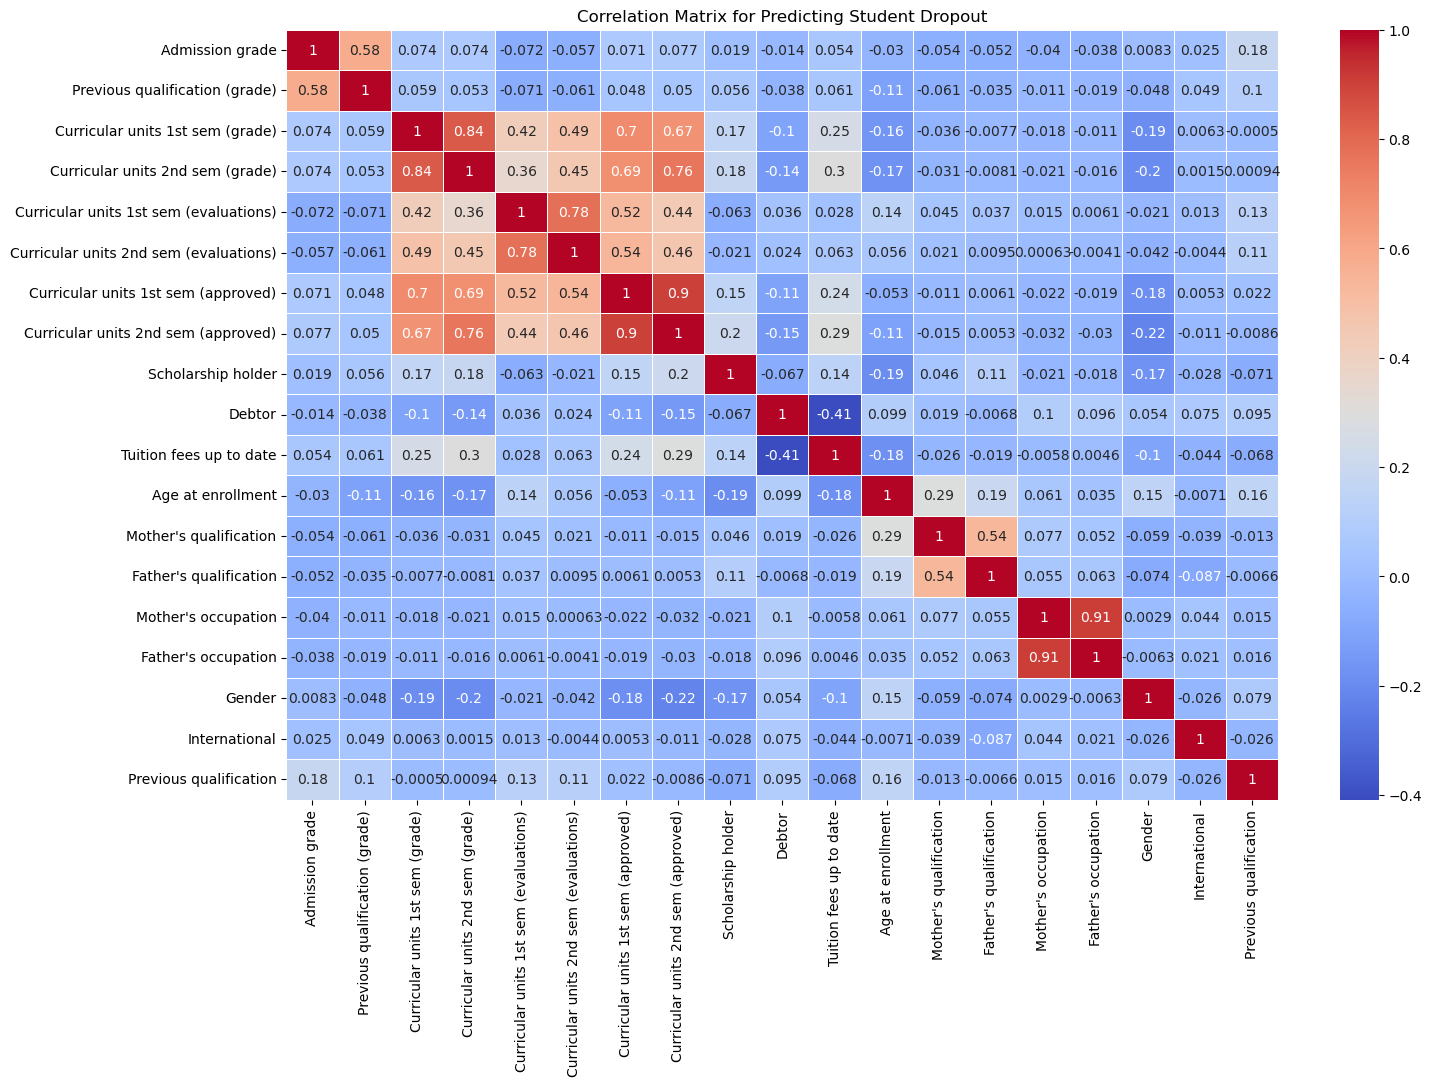

In [5]:
relevant_columns = [
    "Admission grade",
    "Previous qualification (grade)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Scholarship holder",
    "Debtor",
    "Tuition fees up to date",
    "Age at enrollment",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Gender",
    "International",
    "Previous qualification"
]

# Creating a new dataframe with only the selected features
corr_data = data[relevant_columns]

# It draws correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    corr_data.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix for Predicting Student Dropout")
plt.show()

<div style="padding:10px; background-color:#fff8df; border-left:6px solid #ffcc00; font-weight:600;">
    In this visualization, I focused only on the features that have a logical
    connection to academic performance, student background, and socio-economic status.
    This avoids meaningless correlations and makes the heatmap more informative.
</div>

<div style="padding:10px; background-color:#e6ffe6; border-left:6px solid #33cc33; font-weight:600;">
    From the correlation matrix, I can know:
    <ul>
        <li>Strong positive relationships between grades and approved curricular units.</li>
        <li>High correlation between semester evaluations and approvals students who take more exams also pass more.</li>
        <li>Admission grade correlates with both 1st and 2nd semester grades.</li>
        <li>Socio-economic variables like scholarship, debtor, tuition fees show weaker correlation but can still be important for classification.</li>
        <li>Demographic features such as gender and international status show low correlation with academic variables, which is expected.</li>
    </ul>
</div>

### Histograms

<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600;">
    These histograms show <b>how academic, demographic, and financial factors 
    are distributed among students</b>. Since the goal of this project is to 
    identify dropout risk, understanding these distributions helps me see 
    patterns that may influence academic success or failure.
</div>

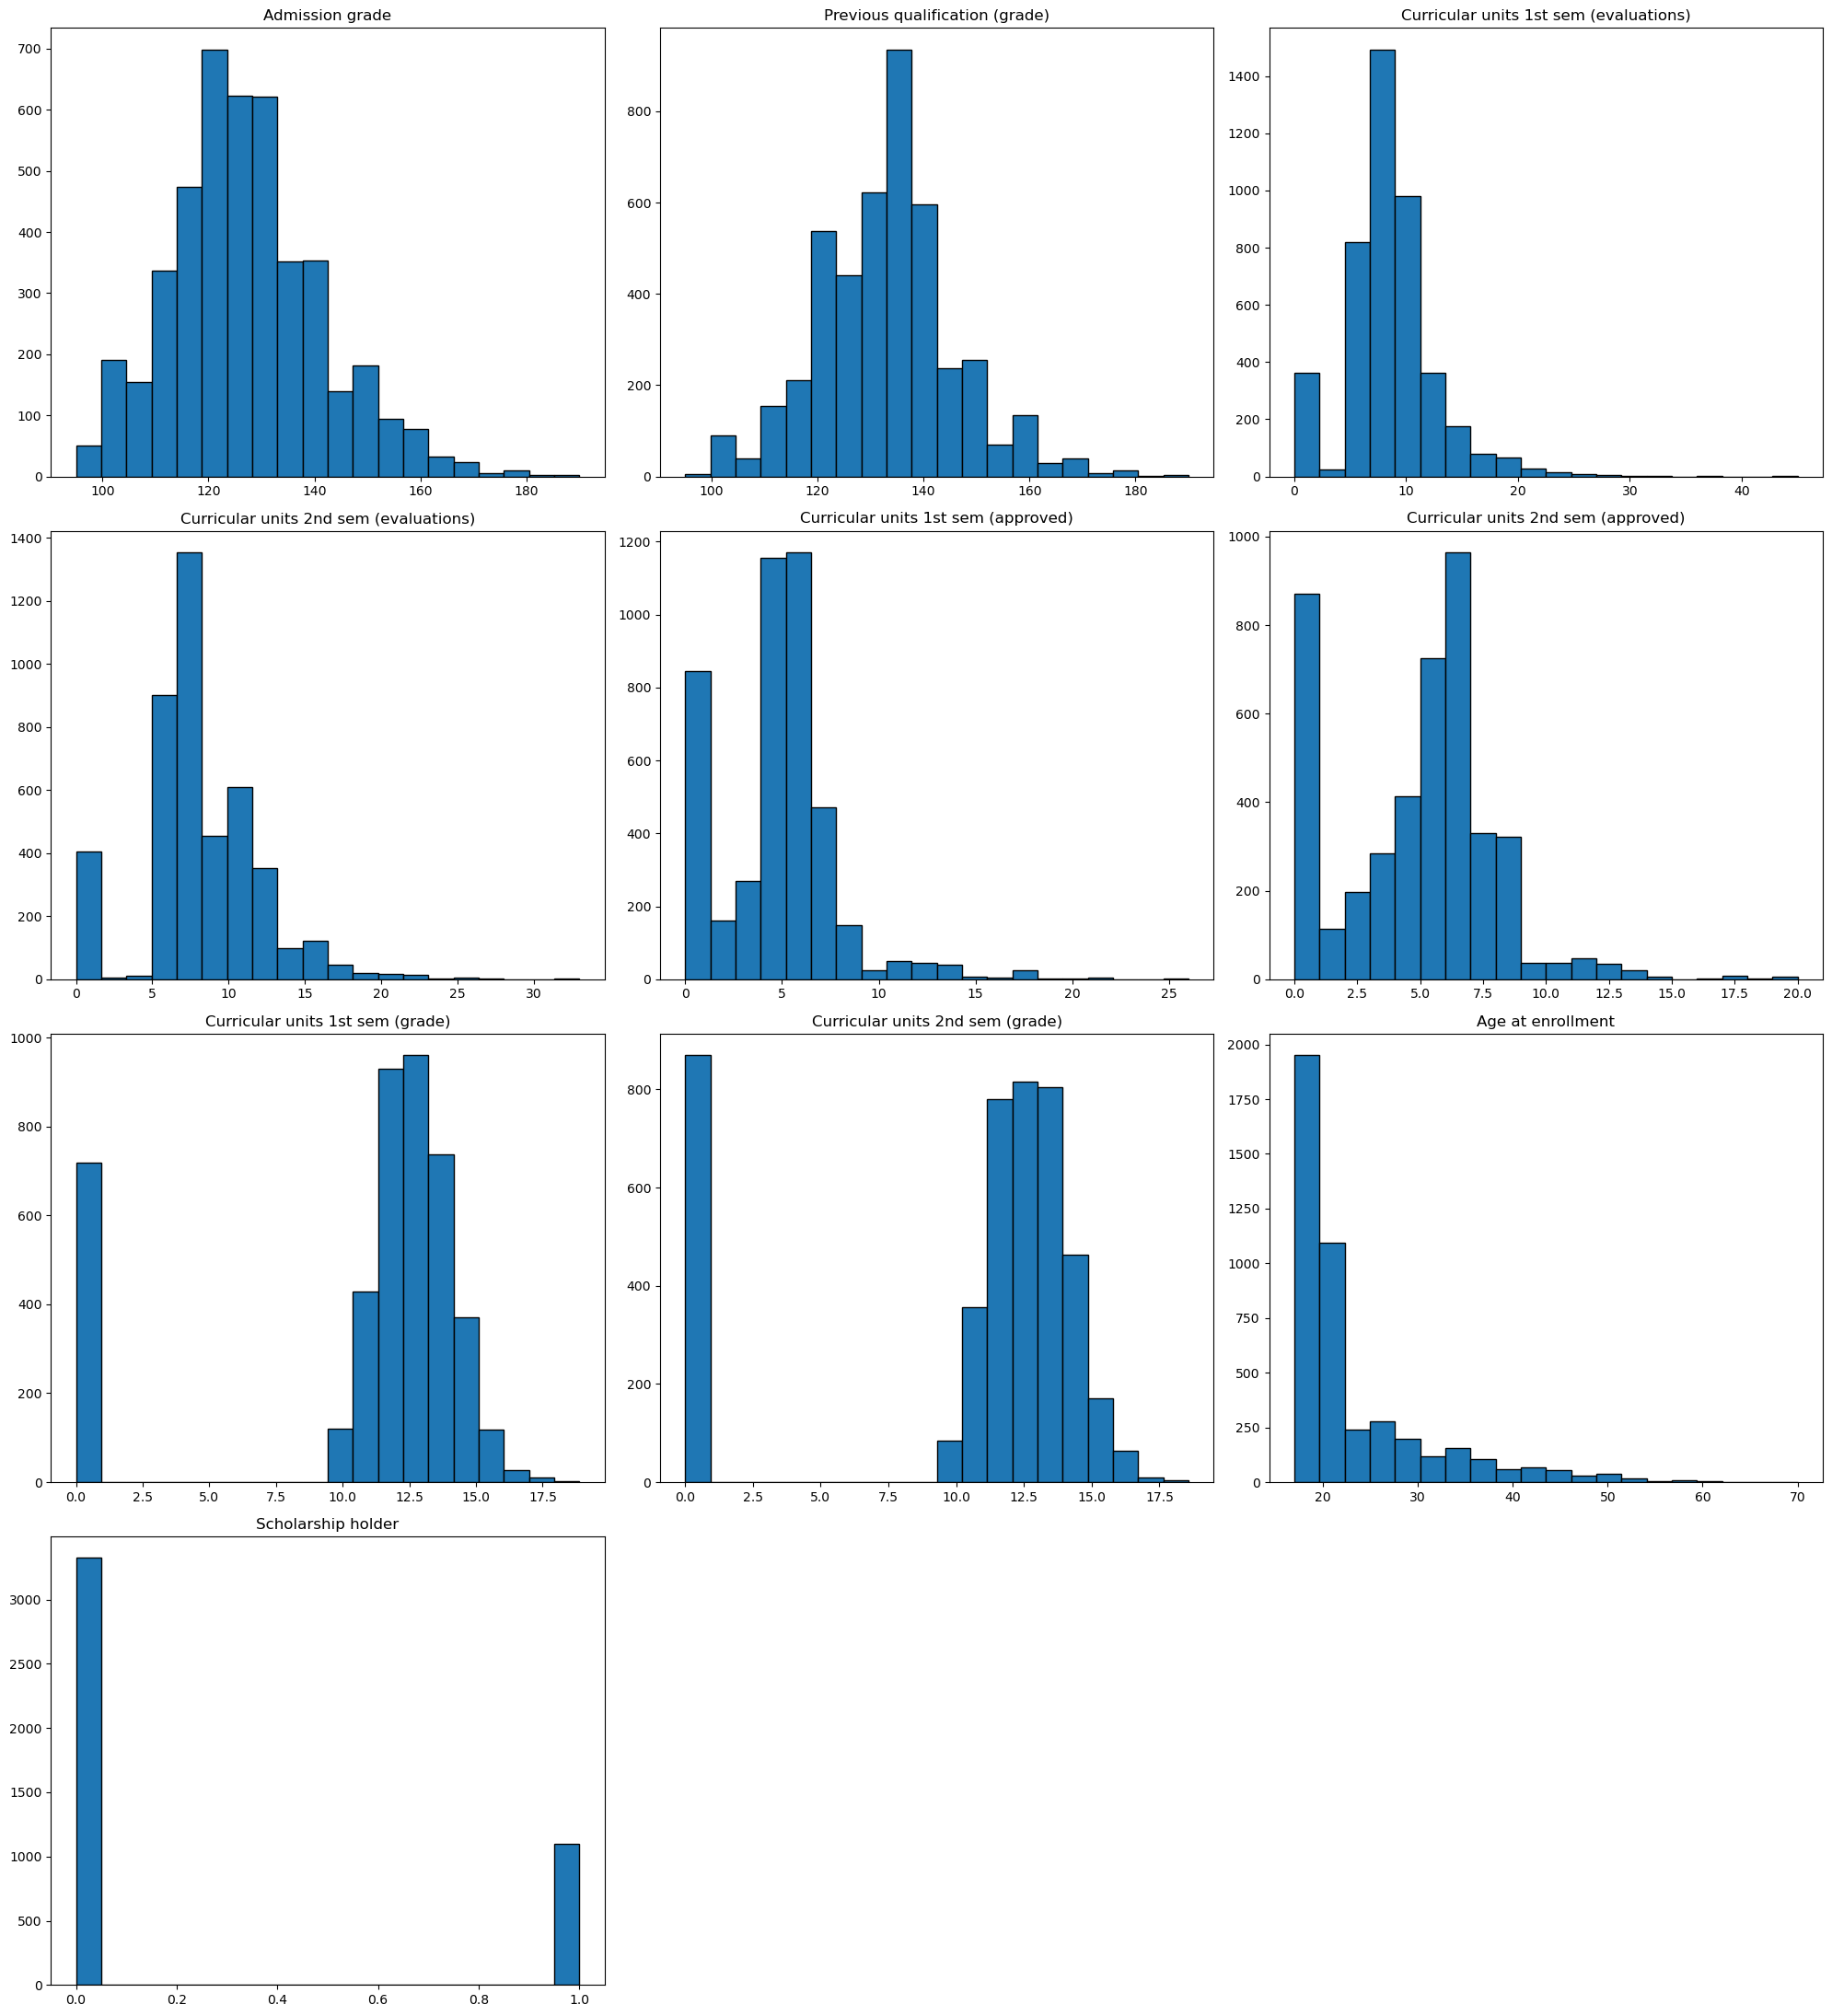

In [6]:
 iden_risk_cols = [
    "Admission grade",
    "Previous qualification (grade)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Age at enrollment",
    "Scholarship holder"
]

top10 = data[iden_risk_cols]
# To create 10 histograms in a grid
plt.figure(figsize=(20, 22))

for i, column in enumerate(top10.columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(top10[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()

<div style="padding:10px; background-color:#e6ffe6; border-left:6px solid #33cc33; font-weight:600;">
    The new histograms give a much clearer picture of the important academic 
    and socio-economic variables that impact student performance. 
    These distributions help me understand which types of students may be 
    more likely to struggle or drop out, which aligns with the purpose of 
    this dataset. Using these meaningful features makes the analysis 
    more accurate and useful for building predictive models.
</div>

### Scatter Plots

<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600;">
    Here I am creating scatter plots using meaningful academic and socio-economic features 
    that can influence a student's early academic performance.  
    plotting these variables against <b>Admission grade</b> helps me understand how 
    students' background and previous performance relate to their initial entry grade.
</div>

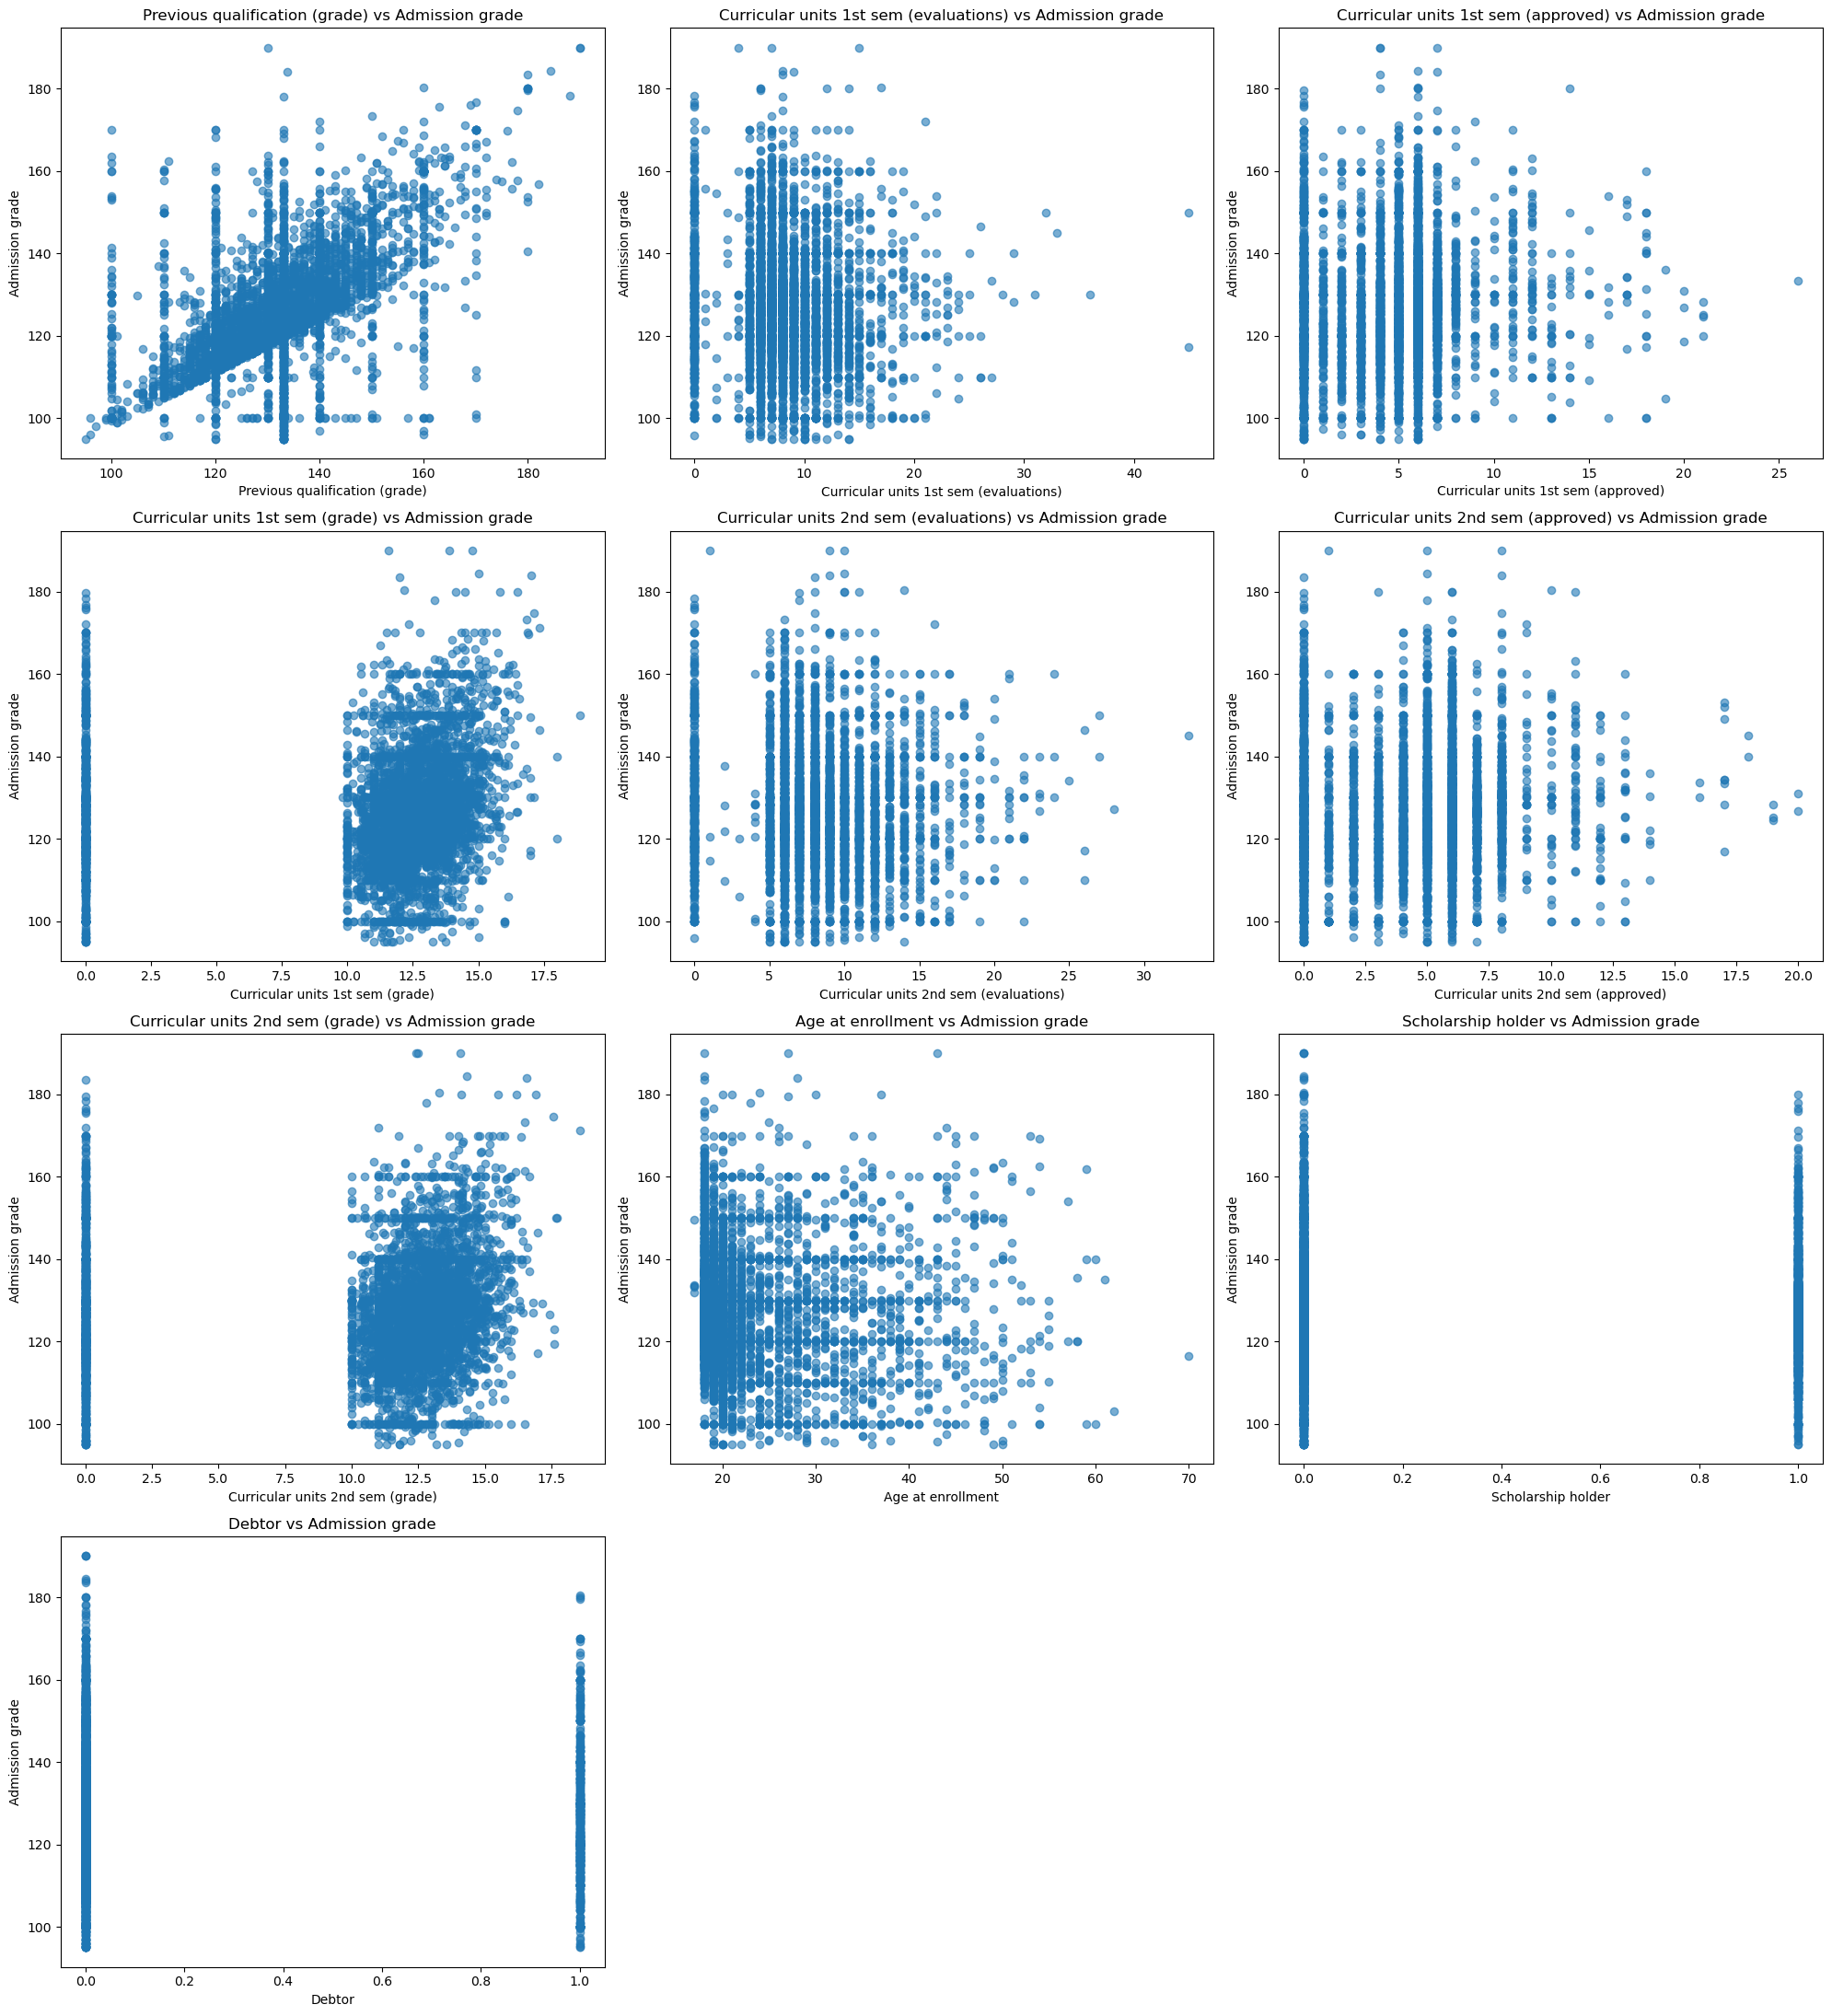

In [7]:
meaningful_cols = [
    "Previous qualification (grade)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Age at enrollment",
    "Scholarship holder",
    "Debtor"
]

top10 = data[meaningful_cols]

plt.figure(figsize=(20, 22))

for i, column in enumerate(top10.columns, 1):
    plt.subplot(4, 3, i)
    plt.scatter(data[column], data["Admission grade"], alpha=0.6)
    plt.xlabel(column)
    plt.ylabel("Admission grade")
    plt.title(f"{column} vs Admission grade")
    plt.tight_layout()

plt.show()

<div style="padding:10px; background-color:#fff8df; border-left:6px solid #ffcc00; font-weight:600;">
    These scatter plots help me see how different student characteristics 
    are related to their Admission grade. This matters because admission 
    grade is an early indicator of how well a student is prepared for 
    higher education. Understanding these patterns is important for 
    predicting dropout risk.
</div>
<div style="padding:10px; background-color:#e6ffe6; border-left:6px solid #33cc33; font-weight:600;">
    Scatter plots provide meaningful insights into the relationship 
    between admission grade and several important academic and socio-economic factors.  
    Higher previous grades, more evaluations, more approved units, and better semester 
    performance are all associated with higher admission grades.  
    Financial variables such as scholarships and debtor status also show visible patterns.  
    These findings will help inform the predictive models used to identify students 
    who may be at risk of dropping out.
</div>

### Polygon Plots

<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600;">
    These polygon plots show the frequency distribution of important categorical 
    and socio-economic features.  
    Since this project aims to understand student dropout risk, 
    visualizing these variables helps identify patterns in 
    <b>family background</b>, <b>financial status</b>, and <b>demographic</b> factors.
</div>

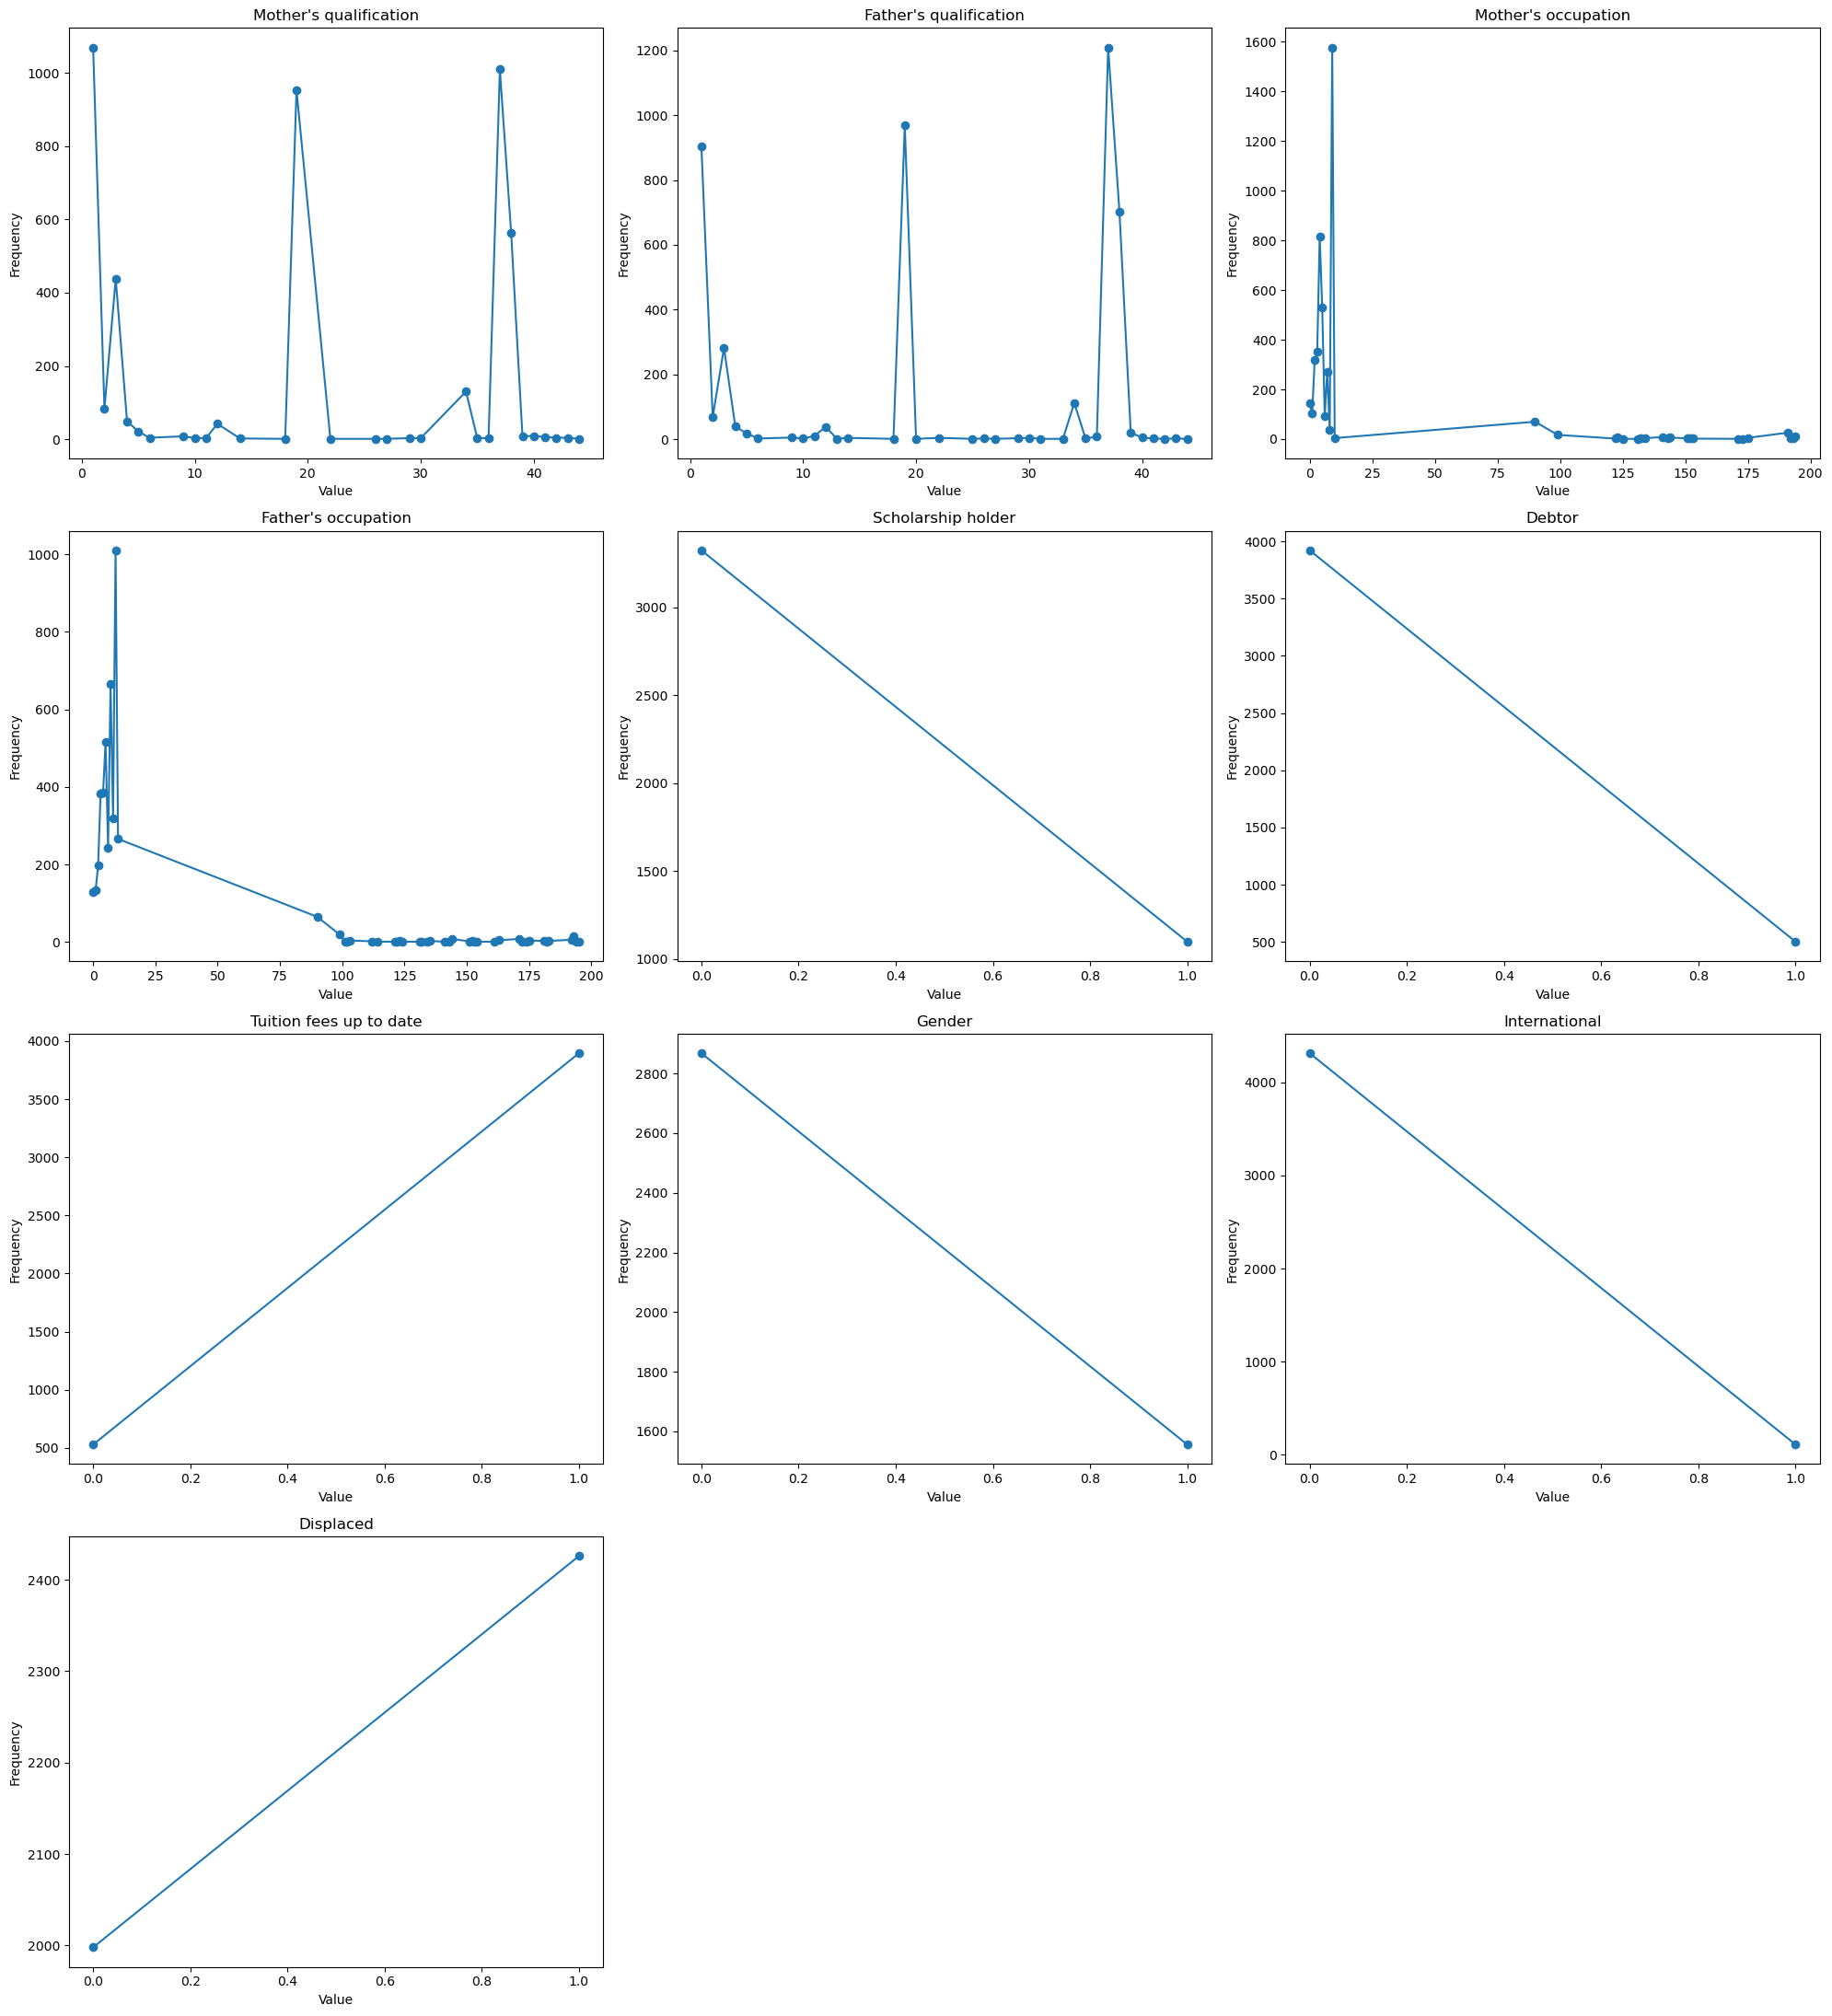

In [8]:
meaningful_categorical_cols = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Scholarship holder",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "International",
    "Displaced"
]

next10 = data[meaningful_categorical_cols]

plt.figure(figsize=(20, 22))

for i, column in enumerate(next10.columns, 1):
    plt.subplot(4, 3, i)

    freq = next10[column].value_counts().sort_index()
    plt.plot(freq.index, freq.values, marker='o')

    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

<div style="padding:10px; background-color:#fff8df; border-left:6px solid #ffcc00; font-weight:600;">
    These polygon plots help me understand how different demographic and 
    socio-economic characteristics are distributed among the students.  
    Since these factors can influence academic engagement and dropout risk, 
    it is useful to visualize how common or uncommon different conditions are.
</div>
<div style="padding:10px; background-color:#e6ffe6; border-left:6px solid #33cc33; font-weight:600;">
    These polygon plots give meaningful insights into how different socio-economic 
    and demographic variables are distributed in the dataset.  
    Since student background is closely connected to academic performance and 
    dropout risk, understanding these distributions helps identify vulnerable 
    groups and supports early intervention strategies.
</div>

### KDE Plots

<div style="padding:10px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600;">
    In this section, I am using KDE plots to visualize the distribution of 
    important continuous variables such as grades and economic indicators.  
    These smooth curves help me understand how student performance and 
    external factors vary across the dataset. This is useful for identifying 
    potential risk patterns related to student dropout.
</div>

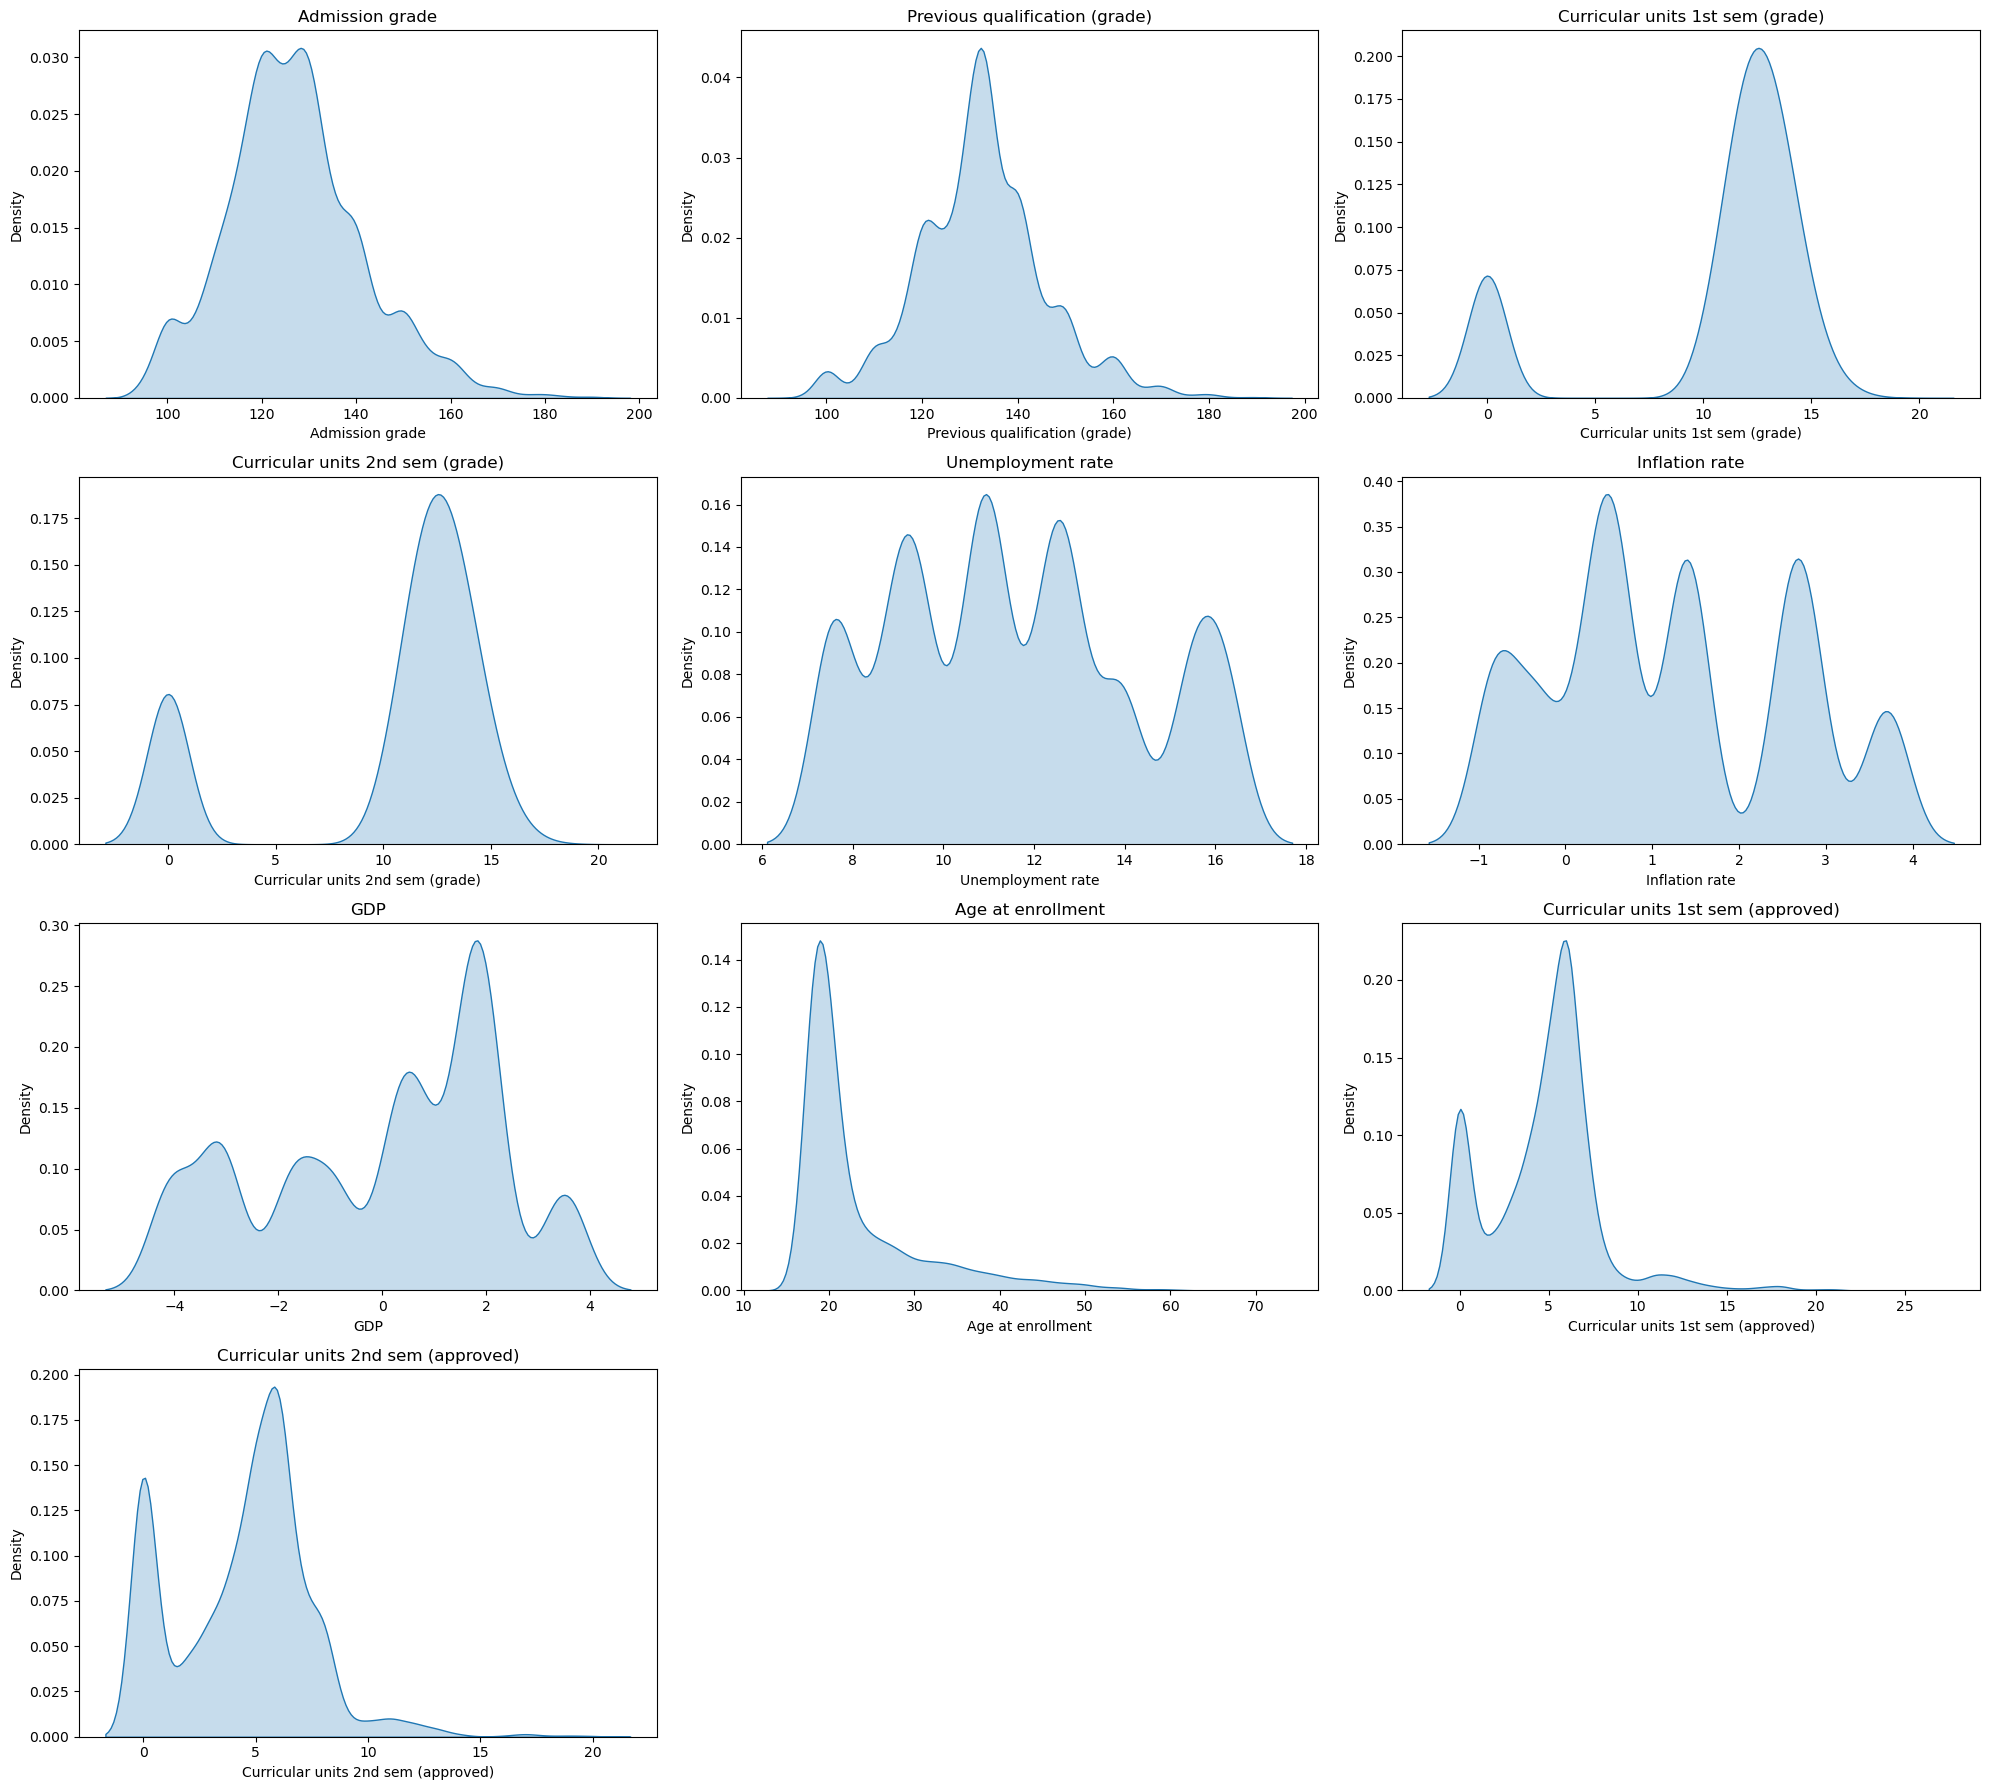

In [9]:

kde_cols = [
    "Admission grade",
    "Previous qualification (grade)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP",
    "Age at enrollment",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)"
]

plt.figure(figsize=(20, 18))

for i, col in enumerate(kde_cols, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data[col], fill=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

<div style="padding:10px; background-color:#fff8df; border-left:6px solid #ffcc00; font-weight:600;">
    These KDE plots show the distribution of the key academic and economic variables 
    in the dataset. Understanding how these values are spread helps me identify 
    which groups of students may be more at risk of dropout.
</div>
<div style="padding:10px; background-color:#e6ffe6; border-left:6px solid #33cc33; font-weight:600;">
    The KDE plots give a smooth and clear visualization of how the most important 
    continuous academic and economic variables are distributed.  
    These insights help identify which students may be <b>academically unprepared</b> 
    or <b>financially vulnerable</b>, both of which are key factors in predicting dropout.
</div>

# Data Preparation

### Encoding the Traget Column

<div style="padding:10px; background-color:#e0f3ff; border-left:5px solid #4da3ff; font-weight:600;">
    Since the Target column contains text categories (Dropout, Enrolled, Graduate),  
    I need to convert them into numbers so machine learning models can understand them.  
    <code>LabelEncoder()</code> is used because the target has only 3 categories.
</div>

In [10]:
le = LabelEncoder()

data["Target"] = le.fit_transform(data["Target"])

# Showing the mapping after encoding
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


### Checking DataFrame Information

<div style="padding:10px; background-color:#f0f7ff; border-left:5px solid #5a9cff; font-weight:600;">
    This shows the structure of the dataset: number of rows, number of columns,  
    data types, and whether there are missing values.  
    This helps me understand what preprocessing steps are needed.
</div>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### To check unique Target Values

<div style="padding:10px; background-color:#fff6e6; border-left:5px solid #ffb84d; font-weight:600;">
    Checking the unique values in the Target column ensures that the encoding  
    was performed correctly and that all classes exist as expected.
</div>

In [12]:
data["Target"].unique()

array([0, 2, 1])

### Checking Missing Values

<div style="padding:10px; background-color:#e6fff2; border-left:5px solid #33cc66; font-weight:600;">
    It is important to check whether the dataset contains any missing values.  
    Since this dataset is already cleaned, all values are present.
</div>

In [13]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

<div style="padding:10px; background-color:#fff4f4; border-left:5px solid #ff6666; font-weight:600;">
    This confirms globally that the dataset has no missing values.  
    This is helpful before training, because many ML models cannot handle NaN values.
</div>

In [14]:
# checks if there any missing values in whole dataset
data.isnull().values.any() 

np.False_

<div style="padding:10px; background-color:#f9f9f9; border-left:5px solid #777; font-weight:600;">
    <b>Duplicate records</b> can bias the model because they give repeated information.  
    This step ensures no duplicated student records exist.
</div>

In [15]:
data.duplicated().sum()

np.int64(0)

<div style="padding:10px; background-color:#f7ecff; border-left:5px solid #a64dff; font-weight:600;">
    This code would normally show duplicated rows.  
    Since the result is 0, the output is an empty table.
</div>

In [16]:
data[data.duplicated()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


<div style="padding:10px; background-color:#e9f4ff; border-left:5px solid #4d94ff; font-weight:600;">
    Checking data types ensures that numerical columns are correctly recognized,  
    especially <b>grade columns</b>, <b>age</b>, <b>economic indicators</b>, and <b>Target</b> after encoding.
</div>

In [17]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [18]:
# Identified continuous columns where outliers matter
continuous_cols = [
    "Admission grade",
    "Previous qualification (grade)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# To gather information one by one
outlier_summary = {}

for col in continuous_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # selecting the lower and upper acceptable boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # to count outliers
    count_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].shape[0]
    
    # Storing results
    outlier_summary[col] = count_outliers
    
outlier_summary

{'Admission grade': 86,
 'Previous qualification (grade)': 179,
 'Curricular units 1st sem (grade)': 726,
 'Curricular units 2nd sem (grade)': 877,
 'Unemployment rate': 0,
 'Inflation rate': 0,
 'GDP': 0}

<div style="padding:12px; background-color:#e0f7ff; border-left:6px solid #4da3ff; font-weight:600;">
    I check for outliers in the continuous features using the Interquartile Range (IQR) method.  
    First, I calculate the 25th percentile (Q1) and the 75th percentile (Q3) for each feature.  
    The IQR is the difference between Q3 and Q1.  
    Any value that falls below Q1 − 1.5×IQR or above Q3 + 1.5×IQR is considered a potential outlier.  

    I created a loop that calculates these boundaries for every continuous column  
    and counts how many values fall outside the acceptable range.  
    This helps identify which variables contain extreme values.  
    These outliers usually appear in grade-related features because student performance  
    can vary widely, and very high or very low exam scores are naturally common.  
</div>

To sum up, I identified the outliers using the IQR method, but I did not remove them because they represent real student variation such as <b>very low grades</b>, <b>very high grades</b> which is important for predicting dropout. Tree-based models handle outliers well, and removing them may reduce performance.

<div style="padding:10px; background-color:#fffae6; border-left:5px solid #ffcc00; font-weight:600;">
    Unique values help identify whether a feature is categorical, continuous,  
    or improperly encoded. This step also helps detect anomalies or incorrect values.
</div>

In [19]:
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

<div style="padding:12px; background-color:#e6ffe6; border-left:8px solid #33cc33; font-weight:600;">
    During the Data Preparation stage, I verified the overall quality of the dataset.  
    First, I converted the Target column into numerical values using <code>LabelEncoder</code>,  
    because machine learning algorithms require numeric inputs.  
    After that, I checked for missing values, duplicated rows, incorrect data types,  
    and unusual categories. All checks confirmed that the dataset is clean, complete,  
    and ready for training. Since there were no errors or missing values,  
    no additional cleaning was needed.  
    These steps ensure that the machine learning models will be trained on correct  
    and reliable data, which is important for predicting student dropout accurately.
</div>

### Data Splitting

<div style="padding:12px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600;">
    In this step, I am splitting the dataset into training and testing parts.  
    The training data will be used to teach the model, and the testing data  
    will be used to evaluate how well the model performs on hidden cases.  
    This is very important to avoid overfitting and to check if the model  
    can generalize to new students who were not part of the training data.
</div>

In [20]:
X = data.drop("Target", axis=1) # selecting all rows and columns except of "Target" column
y = data["Target"] # selecting only "Target" column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

<div style="padding:12px; background-color:#fff8df; border-left:6px solid #ffcc00; font-weight:600;">
    I split the dataset into 80% training data and 20% testing data.  
    The training data is used to build the prediction model,  
    and the test data is used to check how accurate the model is  
    on new students who were not used during training.  
    Using <code>random_state=42</code> ensures that I always get the same split  
    every time I run the notebook, which makes the results consistent.
</div>

In [21]:
# after splitting, shapes
print("Training set shapes → X:", X_train.shape, "y:", y_train.shape)
print("Testing  set shapes → X:", X_test.shape,  "y:", y_test.shape)

Training set shapes → X: (3539, 36) y: (3539,)
Testing  set shapes → X: (885, 36) y: (885,)


In [22]:
# y values
y_train

3383    0
2840    1
564     2
1786    0
3900    2
       ..
3444    0
466     1
3092    2
3772    2
860     0
Name: Target, Length: 3539, dtype: int64

In [23]:
# x values
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
3383,4,7,1,9147,1,3,130.0,1,19,1,...,0,0,5,5,0,0.000000,0,11.1,0.6,2.02
2840,1,39,1,9085,1,1,130.0,1,37,37,...,0,0,6,14,2,11.333333,0,11.1,0.6,2.02
564,1,1,6,9070,1,6,119.0,1,1,1,...,0,0,6,8,6,13.625000,0,10.8,1.4,1.74
1786,2,39,1,9238,1,19,133.1,1,37,37,...,0,0,6,0,0,0.000000,0,15.5,2.8,-4.06
3900,1,1,3,9500,1,1,142.0,1,37,38,...,0,0,7,7,6,13.900000,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,1,2,9070,1,1,134.0,1,1,19,...,1,0,6,11,4,11.333333,0,13.9,-0.3,0.79
466,1,1,1,9853,1,1,133.0,1,1,38,...,0,4,8,8,8,12.625000,0,15.5,2.8,-4.06
3092,1,1,1,8014,0,1,100.0,1,38,19,...,0,0,6,6,6,12.500000,0,12.7,3.7,-1.70
3772,1,1,4,9238,1,1,127.0,1,1,38,...,0,0,6,7,6,13.428571,0,11.1,0.6,2.02


In [24]:
# checking the categorical values of each columns

print("----Values of categoric attributes------")
for idx, col in enumerate(X_train.columns, start=1):
    print("==="*20)
    print(f"{idx}. {col} = {np.sort(X_train[col].unique())} ")

----Values of categoric attributes------
1. Marital status = [1 2 3 4 5 6] 
2. Application mode = [ 1  2  5  7 10 15 16 17 18 26 27 39 42 43 44 51 53 57] 
3. Application order = [0 1 2 3 4 5 6 9] 
4. Course = [  33  171 8014 9003 9070 9085 9119 9130 9147 9238 9254 9500 9556 9670
 9773 9853 9991] 
5. Daytime/evening attendance	 = [0 1] 
6. Previous qualification = [ 1  2  3  4  5  6  9 10 12 14 15 19 38 39 40 42 43] 
7. Previous qualification (grade) = [ 95.   96.   97.   99.  100.  101.  102.  103.  105.  106.  107.  108.
 109.  110.  111.  112.  113.  114.  115.  116.  117.  117.4 118.  118.9
 119.  120.  121.  122.  123.  123.9 124.  124.4 125.  126.  126.6 127.
 128.  129.  130.  131.  132.  133.  133.1 134.  135.  136.  137.  138.
 138.6 139.  140.  140.8 141.  142.  143.  144.  145.  145.7 146.  147.
 148.  148.9 149.  150.  151.  152.  153.  154.  154.4 155.  156.  157.
 158.  159.  160.  161.  162.  163.  163.3 164.  165.  166.  167.  168.
 169.  170.  172.  175.  176.  177.  17

## Module Training


<div style="padding:12px; background-color:#e0f7fa; border-left:6px solid #0097a7; font-weight:600;">
    Now that the Random Forest is tuned, I train the three models on the same training data.  
    The three models used are:
    <ul>
        <li>Decision Tree</li>
        <li>Random Forest (Tuned)</li>
        <li>KNN</li>
    </ul>
</div>

<div style="padding:12px; background-color:#e0f3ff; border-left:6px solid #4da3ff; font-weight:600;">
    I am training three machine learning models on the student dataset  
    to predict whether a student will <b>Dropout</b>, <b>Enrolled</b>, or <b>Graduate</b>.  
    Since the dataset is already clean and numerical, I chose tree-based models because  
    they do not require feature scaling and can handle categorical values encoded as numbers.
</div>


<div style="padding:12px; background-color:#fff7e6; border-left:6px solid #ffb84d; font-weight:600;">
    Before training all models, I use <code>GridSearchCV</code> to tune the number of trees  
    (n_estimators) for the Random Forest.  
    This helps improve its performance by finding how many trees give the best accuracy.
</div>

#### Random Forest Algorithm 'Accuracy Scoring'

In [25]:
# Random Forest Hyperparameter Tuning
rf_params = {
    "n_estimators": [100, 200, 300, 400, 500]
}

rf_clf = RandomForestClassifier(random_state=42)

rf_model = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

print("\nBest number of trees:", rf_model.best_params_['n_estimators'])
print("Cross-validated accuracy:", rf_model.best_score_)


Best number of trees: 300
Cross-validated accuracy: 0.773101910675329


<div style="padding:12px; background-color:#e6ffe6; border-left:6px solid #33cc33; font-weight:600;">
    The best value of <b>n_estimators</b> is <b>300</b>, meaning the Random Forest works best  
    when using 300 decision trees.  
    The cross-validation accuracy of around <b>77%</b> shows that the model performs well  
    across multiple training splits.
</div>

In [26]:
# Train on the model

rf_final = RandomForestClassifier(n_estimators=rf_model.best_params_['n_estimators'], random_state=42)
rf_final.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# Extract feature importances
rf_importances = pd.Series(rf_final.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Setting a threshold using the top 50 percent most important features
rf_threshold = rf_importances.median()
# To Select features above the threshold
selected_features_rf = rf_importances[rf_importances > rf_threshold].index.tolist()

# Select features above the 
print("Selected Features (Random Forest):")
print(selected_features_rf)

Selected Features (Random Forest):
['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Admission grade', 'Previous qualification (grade)', 'Age at enrollment', 'Curricular units 1st sem (evaluations)', 'Course', "Father's occupation", "Mother's occupation", 'GDP', 'Unemployment rate', 'Curricular units 2nd sem (enrolled)', "Father's qualification", "Mother's qualification"]


In [28]:
# Fitting RF using only selected features
rf_final.fit(X_train[selected_features_rf], y_train)
# Predict using selected features
rf_selected_pred = rf_final.predict(X_test[selected_features_rf])

print(rf_selected_pred)

[0 2 2 2 0 1 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 0 2 2 2 0 2 1 0 2 0 1 0 0 1 2
 2 2 1 0 0 1 0 0 2 2 2 2 2 2 2 0 0 1 0 2 2 2 2 0 2 2 2 2 2 2 2 1 0 2 2 0 2
 2 2 2 1 2 2 0 0 2 0 2 0 2 2 2 1 0 2 2 2 0 2 0 2 0 0 2 2 2 0 0 0 2 0 1 2 0
 2 2 2 2 2 2 2 2 0 2 0 0 2 1 0 2 0 2 2 2 2 2 1 2 2 0 2 0 1 0 0 2 2 2 2 2 2
 0 2 2 0 0 2 0 2 2 2 0 2 1 2 2 2 1 2 0 1 2 0 2 2 2 2 0 2 1 0 2 2 0 2 0 0 2
 0 0 2 2 0 2 0 0 1 2 1 2 2 0 2 0 2 0 2 2 0 2 0 2 2 2 0 2 2 2 2 2 0 0 1 2 2
 0 2 0 0 2 0 0 2 2 0 1 0 1 2 0 2 2 2 2 0 0 1 2 0 0 0 2 1 2 2 2 2 2 2 0 2 2
 2 2 2 0 0 2 2 2 2 2 0 0 2 0 0 2 2 2 1 2 2 2 2 2 0 0 0 1 0 1 1 0 1 0 2 2 2
 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 0 1 2 2 2 2 0 2 2 2 0 2 0 0 2 0 1 2 1 2 0 2
 0 2 2 1 0 2 1 2 0 0 2 0 0 0 2 1 2 2 0 0 1 2 0 0 2 1 2 1 2 2 0 2 0 2 2 2 1
 2 2 0 2 0 2 2 0 0 0 2 2 0 0 0 2 2 1 2 0 2 0 2 1 2 0 2 0 1 2 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 1 2 2 2 0 0 2 2 2 1 0 0 1 0 0 0 2 2 2 0 2 0 2 2 2 0 2 2
 2 2 2 2 2 2 1 0 0 0 0 1 2 0 2 0 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 1 2 0
 2 2 0 0 0 0 0 2 2 0 1 2 

<div style="padding:12px; border-left:6px; font-weight:600;">
    I optimized the Random Forest model by tuning the number of trees 
    <b>(n_estimators)</b> using <code>GridSearchCV</code>. The best value found was 300 trees. After training 
    the model with these settings, I calculated feature importances and selected the 
    top 12 most important features instead of using a median-based threshold. 
    This method focuses only on the strongest predictors, which can improve 
    generalization and reduce noise. The model was retrained on the selected features 
    and used to generate predictions.
</div>

### Decision Tree Module

In [29]:
# decision tree feature selection
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Feature importance extraction
dt_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Threshold anything above 0 DT gives many zeros
selected_features_dt = dt_importances[dt_importances > 0].index.tolist()

print("Selected Features Decision Tree:")
print(selected_features_dt)

# Retrain DT with selected features
dt_model.fit(X_train[selected_features_dt], y_train)


Selected Features Decision Tree:
['Curricular units 2nd sem (approved)', 'Admission grade', 'Tuition fees up to date', 'Previous qualification (grade)', 'Curricular units 2nd sem (grade)', 'Age at enrollment', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', "Father's occupation", 'Course', 'Curricular units 1st sem (approved)', 'GDP', "Mother's occupation", 'Curricular units 2nd sem (enrolled)', "Father's qualification", 'Application mode', 'Application order', "Mother's qualification", 'Inflation rate', 'Unemployment rate', 'Gender', 'Scholarship holder', 'Previous qualification', 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Debtor', 'Curricular units 1st sem (credited)', 'Nacionality', 'Displaced', 'International', 'Daytime/evening attendance\t', 'Curricular units 2nd sem (without evaluations)', 'Marital status']


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
# Fitting the DT with choosen features

dt_model.fit(X_train[selected_features_dt], y_train)
y_predict_dt = dt_model.predict(X_test[selected_features_dt])

print(y_predict_dt)

[0 2 0 1 0 1 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 0 2 2 2 0 2 1 0 0 0 0 0 0 1 2
 0 2 1 0 0 2 0 0 1 2 1 2 2 2 2 1 0 1 0 2 2 2 2 0 2 2 0 2 0 2 2 2 0 2 2 0 2
 2 2 2 1 2 2 0 1 2 2 2 0 2 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 1 0 0 1 2 0 0 2 1
 2 2 1 2 2 0 2 0 0 0 0 0 2 1 0 2 0 2 2 1 2 2 1 1 2 0 0 0 1 0 1 0 2 2 2 2 2
 0 2 2 0 1 1 0 2 2 2 0 2 1 2 2 2 2 1 0 1 1 0 0 2 2 2 0 2 1 1 2 2 0 2 0 0 2
 0 0 2 2 0 2 0 0 1 2 0 2 2 0 2 0 2 0 2 2 0 2 1 1 2 2 0 2 2 2 2 2 0 0 1 2 2
 0 2 0 0 2 0 1 2 2 0 1 0 1 1 1 2 2 2 2 0 1 0 2 0 0 0 2 1 2 1 2 2 2 2 0 2 2
 2 1 2 0 1 2 2 2 0 2 0 0 2 1 0 2 2 2 1 2 2 2 0 2 1 0 1 1 0 1 1 0 1 0 2 2 2
 0 1 1 2 2 1 0 2 0 0 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 2 2 2 0 2
 0 2 2 1 0 2 1 1 0 0 2 0 0 0 2 0 2 1 1 1 1 2 0 1 2 1 2 0 2 2 0 1 0 2 2 2 1
 2 2 0 2 0 2 1 0 1 1 0 2 0 1 0 1 2 1 2 0 1 0 2 1 2 0 1 1 1 2 2 0 0 2 2 2 1
 2 2 2 2 1 2 2 2 1 1 2 2 2 1 0 1 2 2 2 0 1 0 1 0 0 2 0 2 0 2 1 2 2 2 0 0 2
 1 2 2 1 1 2 1 1 0 0 0 1 2 1 2 0 2 2 2 0 2 2 0 2 0 2 0 2 1 2 2 1 2 1 2 2 1
 1 2 0 1 0 0 0 1 2 1 1 2 

#### KNN algorithm 

In [31]:
# Selecting KNN features using Chi-square for the features and see them for KNN
X_train_knn = X_train.copy()
X_train_knn = X_train_knn - X_train_knn.min()


selector = SelectKBest(score_func=chi2, k=36)
selector.fit(X_train_knn, y_train)
selected_features_knn = X_train.columns[selector.get_support()].tolist()

print("Selected KNN features:", selected_features_knn)

Selected KNN features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'

In [32]:
# Fit scaler ONLY on selected KNN features
scaler = StandardScaler()
X_train_knn_scaled = scaler.fit_transform(X_train[selected_features_knn])
X_test_knn_scaled = scaler.transform(X_test[selected_features_knn])

In [33]:
# KNN Hyperparameter Tuning
knn_params = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15]}

knn_base = KNeighborsClassifier()
knn_search = GridSearchCV(estimator=knn_base, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_search.fit(X_train_knn_scaled, y_train)

print("Best K:", knn_search.best_params_)
print("Best CV Accuracy:", knn_search.best_score_)

Best K: {'n_neighbors': 11}
Best CV Accuracy: 0.7120685797393298


In [34]:
#  training and feature selection for KNN Model
best_knn = KNeighborsClassifier(n_neighbors=knn_search.best_params_["n_neighbors"])

best_knn.fit(X_train_knn_scaled, y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


<div>
  In this section, I trained three machine learning models to classify students into 
  <b>Dropout</b>, <b>Enrolled</b>, or <b>Graduate</b>.  
  Each model was built and tested on the same dataset so that their performances 
  could be compared fairly.

• The <b>Decision Tree</b> achieved around <b>68%</b> accuracy, which was the lowest among the models.  
  It correctly identified most Dropout and Graduate students, but it struggled to detect 
  the <b>Enrolled</b> group. This is expected because Decision Trees often overfit the training data.

• The <b>Random Forest</b> model, after tuning the number of trees, achieved around <b>76%</b> accuracy.  
  Since it combines many decision trees, it becomes more stable and less sensitive to noise.  
  It performed very well for <b>Graduate</b> students and showed good performance for Dropouts, 
  although the Enrolled class remained challenging.

• I also trained a <b>K-Nearest Neighbors (KNN)</b> model, which required scaling the features.  
  After tuning the number of neighbors, KNN reached around <b>71%</b> accuracy.  
  The model performed strongly for the Graduate class but had difficulty separating 
  Enrolled students from the others, likely because this class is smaller and overlaps 
  with the characteristics of both Dropouts and Graduates.

  Overall, the <b>Random Forest</b> provided the most reliable and balanced results.  
  All models showed difficulty classifying the Enrolled category, which suggests that 
  these students share traits with both Dropouts and Graduates.  
  Despite this challenge, the results are useful for identifying students who may be 
  <b>at risk</b> and could benefit from early academic support.

Reefrence: https://www.analytixlabs.co.in/blog/types-of-machine-learning-algorithms-with-examples/
  
</div>

## Model Evaluation

<div style="padding:12px; background-color:#e0f3ff; border-left:7px solid #4da3ff; font-weight:600;">
    In this section, I evaluate the performance of the three machine learning models  
    trained earlier: Decision Tree, Random Forest (tuned), and KNN.  
    I use the test set to measure how well each model can predict whether a student  
    will Dropout, Enroll, or Graduate.  
    The evaluation uses several metrics including Accuracy, Precision, Recall,  
    and F1-score, which help me compare the models fairly.
</div>

In [35]:
# it is also supportive fuction for metrics calcualtion then return results as dictionary
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (macro)": precision_score(y_true, y_pred, average="macro"),
        "Recall (macro)": recall_score(y_true, y_pred, average="macro"),
        "F1-score (macro)": f1_score(y_true, y_pred, average="macro")
    }

In [36]:
# to create Confusion Matrix we used target table values  
def show_conf_matrix(y_true, y_pred, title):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Dropout', 'Enrolled', 'Graduate'])
    disp.plot(cmap="Greens")
    plt.title(title)
    plt.show()

In [37]:
# Generating predictions by using selected features which we get it from trained modules 

# Decision Tree module
dt_predictions = dt_model.predict(X_test[selected_features_dt])
# Random Forest module
rf_predictions = rf_final.predict(X_test[selected_features_rf])
# KNN algorithms
knn_predictions = best_knn.predict(X_test_knn_scaled)

In [38]:
# Evaluating all models with help of their predection for metrics

results = {
    "Decision Tree": get_metrics(y_test, dt_predictions),
    "Random Forest (Tuned)": get_metrics(y_test, rf_predictions),
    "KNN (Scaled)": get_metrics(y_test, knn_predictions)
}

evaluation_df = pd.DataFrame(results).T
display(evaluation_df)

,Accuracy,Precision (macro),Recall (macro),F1-score (macro)
Decision Tree,0.679096,0.624767,0.626385,0.624243
Random Forest (Tuned),0.768362,0.719688,0.679155,0.689367
KNN (Scaled),0.714124,0.653935,0.601116,0.605100


<Figure size 600x500 with 0 Axes>

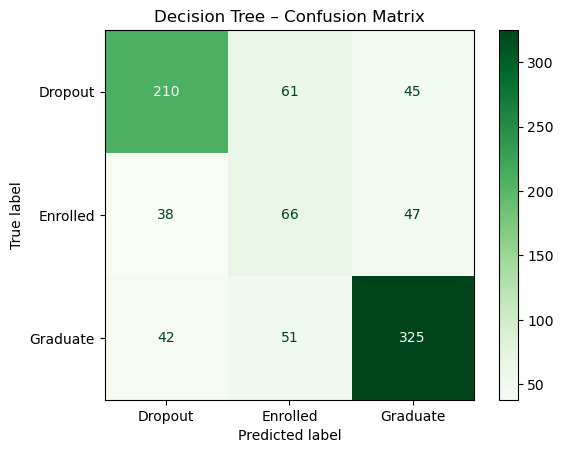

<Figure size 600x500 with 0 Axes>

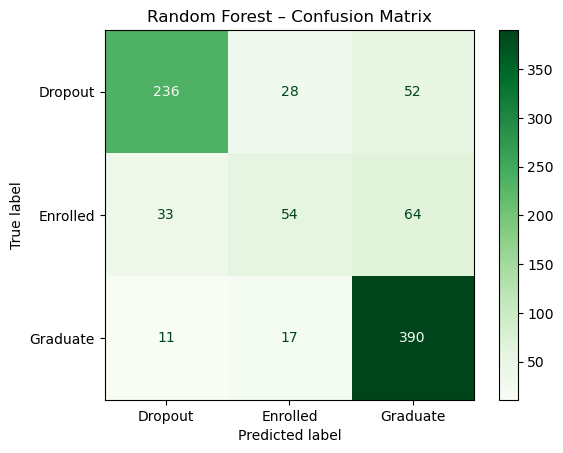

<Figure size 600x500 with 0 Axes>

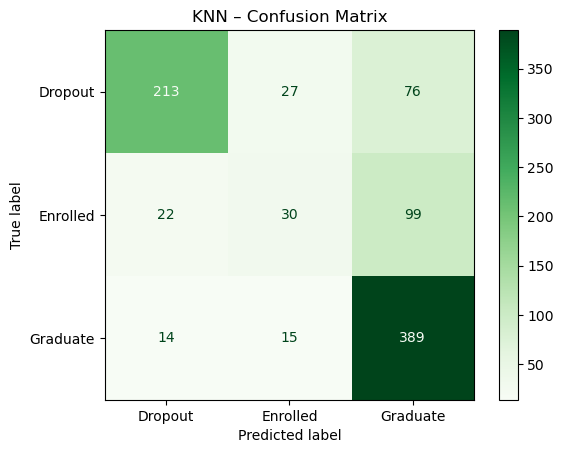

In [39]:
# Drawing Confusion matrix for each Evaluated models to visualize all

show_conf_matrix(y_test, dt_predictions, "Decision Tree – Confusion Matrix")
show_conf_matrix(y_test, rf_predictions, "Random Forest – Confusion Matrix")
show_conf_matrix(y_test, knn_predictions, "KNN – Confusion Matrix")


### Model Saving

<div style="padding:15px; border-left:6px; font-size:15px;"> 
    To make our machine learning models work inside a <code>Streamlit application</code>, we must save not only the trained models but also the lists of features they expect. This is important because the Streamlit interface will collect inputs from the user using these exact features. Later, when the app loads the model, it will rebuild the input row based on the same selected features. If we do not save which features were used during training, the model will not accept the new inputs. 
</div>

Reference: https://www.geeksforgeeks.org/python/a-beginners-guide-to-streamlit/

In [40]:
# ---- Saving the trained models ----
joblib.dump(dt_model, "src/saved_models/decision_tree.pkl")
joblib.dump(rf_final, "src/saved_models/random_forest.pkl")
joblib.dump(best_knn, "src/saved_models/knn_model.pkl")

# ---- Saving selected features (important for Streamlit inputs) ----
joblib.dump(selected_features_rf, "src/saved_features/rf_selected_features.pkl")
joblib.dump(selected_features_dt, "src/saved_features/dt_selected_features.pkl")
joblib.dump(selected_features_knn, "src/saved_features/knn_selected_features.pkl")

# Creating Label Map for Streamlit UI part
label_map = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
joblib.dump(label_map, "src/saved_models/label_map.pkl")
knn_caler = joblib.dump(scaler, "src/saved_models/knn_scaler.pkl")

## Streamlit UI Preparation

In [41]:
# Before building the Streamlit interface, we need to load the trained modules and selected features.

dt_model = joblib.load("src/saved_models/decision_tree.pkl")
rf_model = joblib.load("src/saved_models/random_forest.pkl")
knn_model = joblib.load("src/saved_models/knn_model.pkl")

selected_features_dt = joblib.load("src/saved_features/dt_selected_features.pkl")
selected_features_rf = joblib.load("src/saved_features/rf_selected_features.pkl")
selected_features_knn = joblib.load("src/saved_features/knn_selected_features.pkl")
Label_map = joblib.load("src/saved_models/label_map.pkl")
knn_caler = joblib.load("src/saved_models/knn_scaler.pkl")


==Approximate Folder Structure==
```
MLDA_CW1_15986/
│
├── project paper/
│     └── MLDA_CW1_15986.docx
│
├── src/
│     ├── dataset/
│     ├── plots/
│     ├── saved_features/
│     └── saved_models/
├── ui/
│     └── Predict_Dropout_Success_ui_app.py
|
├── .gitignore
└── requirements.txt
```

## Selected Features

In [42]:
selected_features_rf

['Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Tuition fees up to date',
 'Curricular units 2nd sem (evaluations)',
 'Admission grade',
 'Previous qualification (grade)',
 'Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Course',
 "Father's occupation",
 "Mother's occupation",
 'GDP',
 'Unemployment rate',
 'Curricular units 2nd sem (enrolled)',
 "Father's qualification",
 "Mother's qualification"]

In [43]:
selected_features_dt

['Curricular units 2nd sem (approved)',
 'Admission grade',
 'Tuition fees up to date',
 'Previous qualification (grade)',
 'Curricular units 2nd sem (grade)',
 'Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (evaluations)',
 "Father's occupation",
 'Course',
 'Curricular units 1st sem (approved)',
 'GDP',
 "Mother's occupation",
 'Curricular units 2nd sem (enrolled)',
 "Father's qualification",
 'Application mode',
 'Application order',
 "Mother's qualification",
 'Inflation rate',
 'Unemployment rate',
 'Gender',
 'Scholarship holder',
 'Previous qualification',
 'Curricular units 2nd sem (credited)',
 'Curricular units 1st sem (without evaluations)',
 'Debtor',
 'Curricular units 1st sem (credited)',
 'Nacionality',
 'Displaced',
 'International',
 'Daytime/evening attendance\t',
 'Curricular units 2nd sem (without evaluations)',
 'Marital status']

In [44]:
selected_features_knn

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r